In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/output.csv'  
df = pd.read_csv(file_path)


print("Dataset Overview:")
print(df.info())

print("\nSample Data:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   obj

In [8]:
# Descriptive Statistics
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

print("\nDescriptive Statistics for Categorical Columns:")
print(df.describe(include=['object']))




Descriptive Statistics for Numerical Columns:
              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.103478  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.159990  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0

In [ ]:
# missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


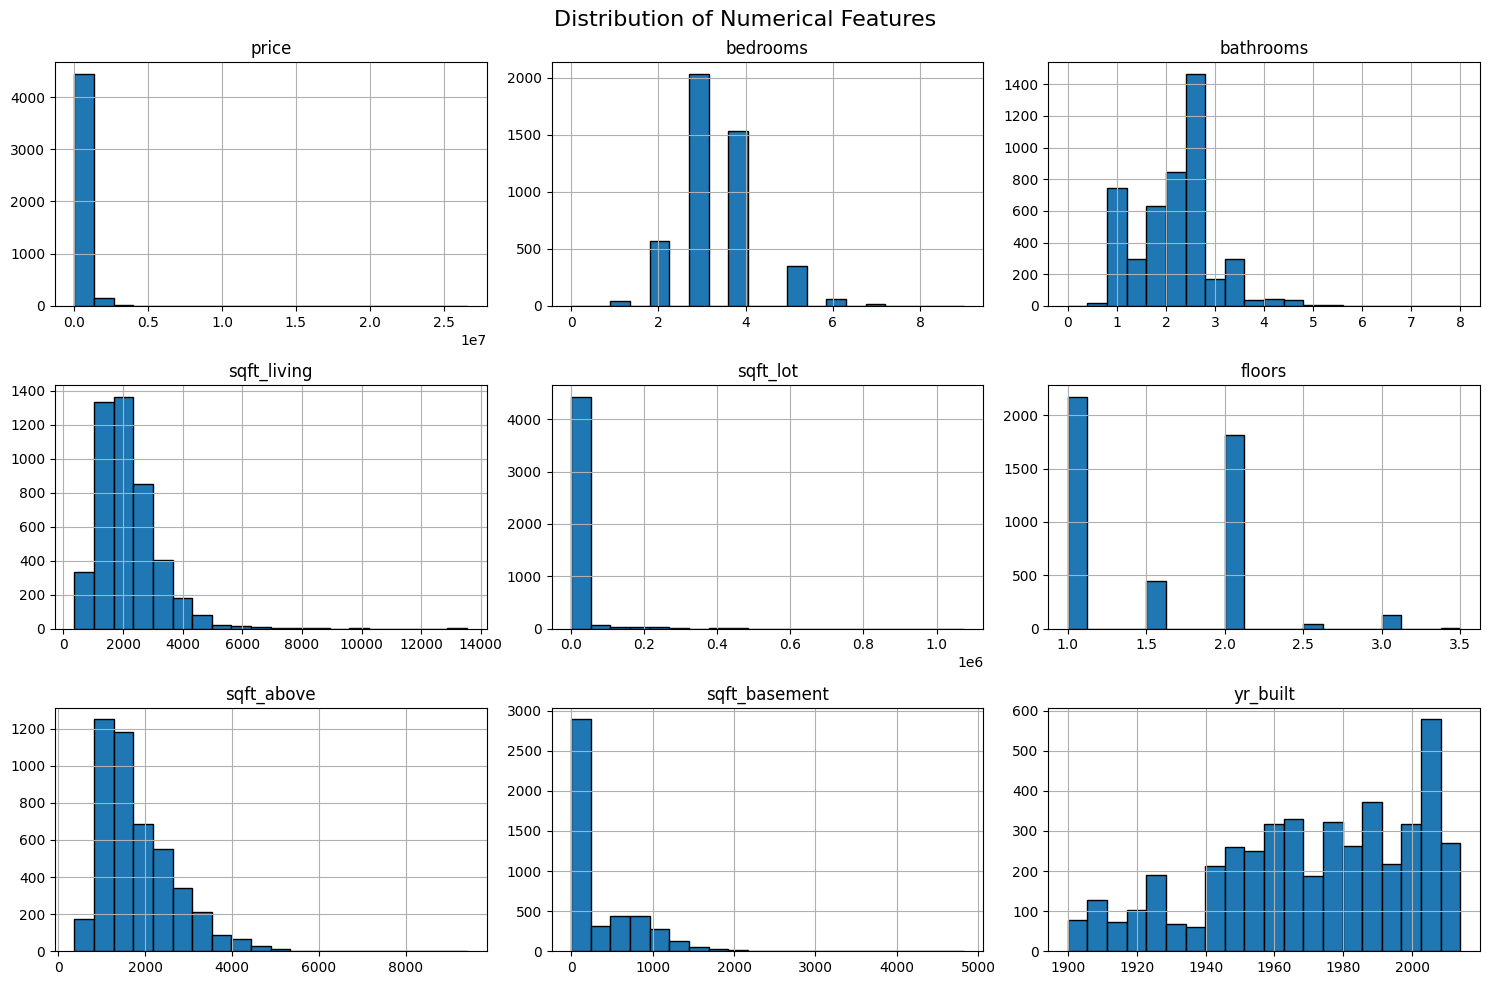

In [ ]:
# distribution of numerical features
num_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built']
df[num_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

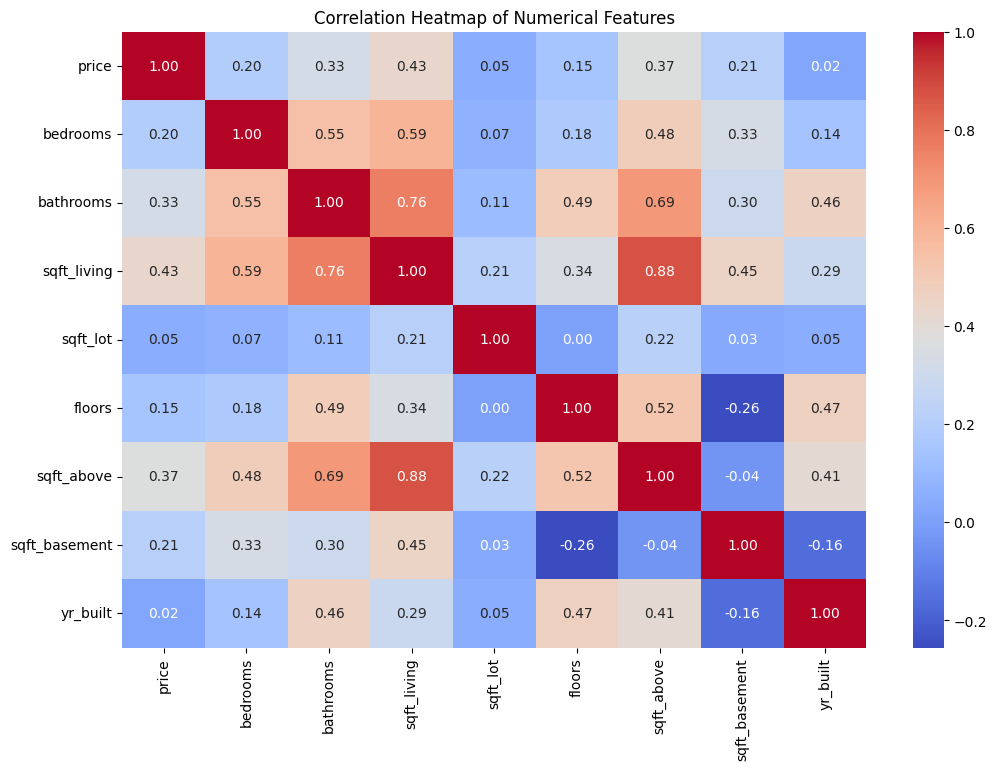

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
#pandas datatime
df['date'] = pd.to_datetime(df['date'])
df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month

#label encoding
df['yr_renovated'] = df['yr_renovated'].replace(0, 'Never Renovated')

df['is_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 'Never Renovated' else 1)

df['sqft_total'] = df['sqft_living'] + df['sqft_basement']


df['house_age'] = df['year_sold'] - df['yr_built']

# redundant columns
df = df.drop(columns=['street', 'country', 'date'])

#
print("Updated Dataset Overview:")
print(df.info())

# zero-value distributions
zero_columns = ['waterfront', 'view', 'sqft_basement', 'yr_renovated']
print("\nZero Values Count for Selected Columns:")
print(df[zero_columns].eq(0).sum())


Updated Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   object 
 13  city           4600 non-null   object 
 14  statezip       4600 non-null   object 
 15  year_sold      4600 non-null   int32  
 16  month_sold     4600 non-null   int32  
 17  is_renovated   4600 non-nu

<ipython-input-13-6eb5ee882566>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_renovated', palette='viridis')


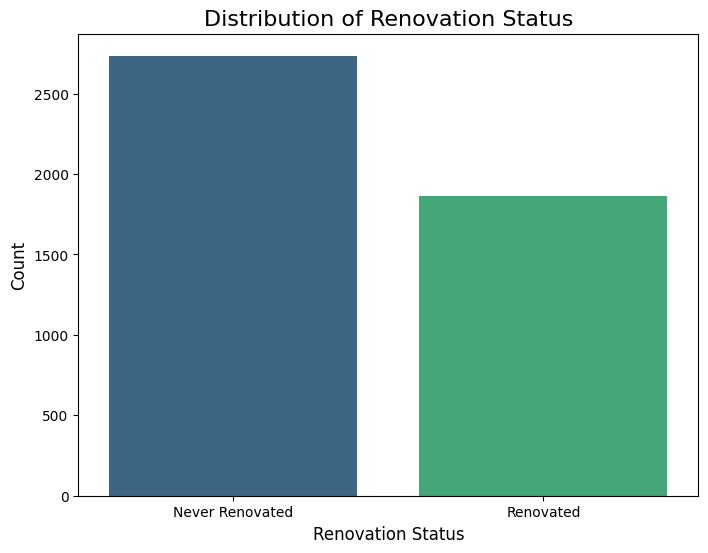

<ipython-input-13-6eb5ee882566>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='waterfront', y='price', palette='coolwarm')


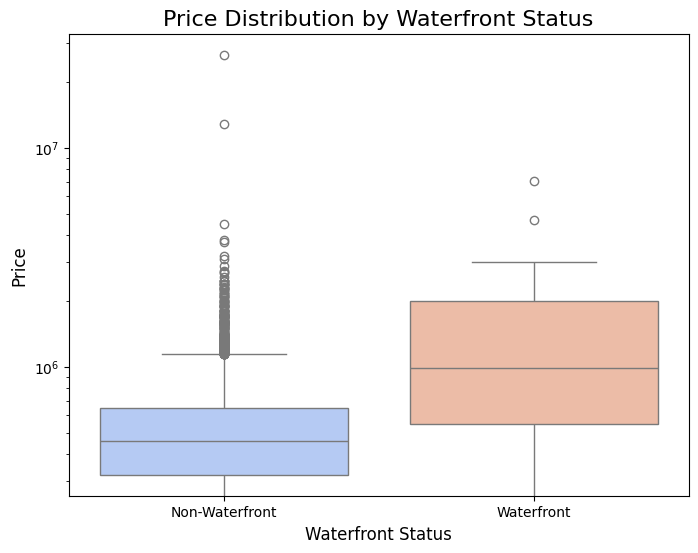

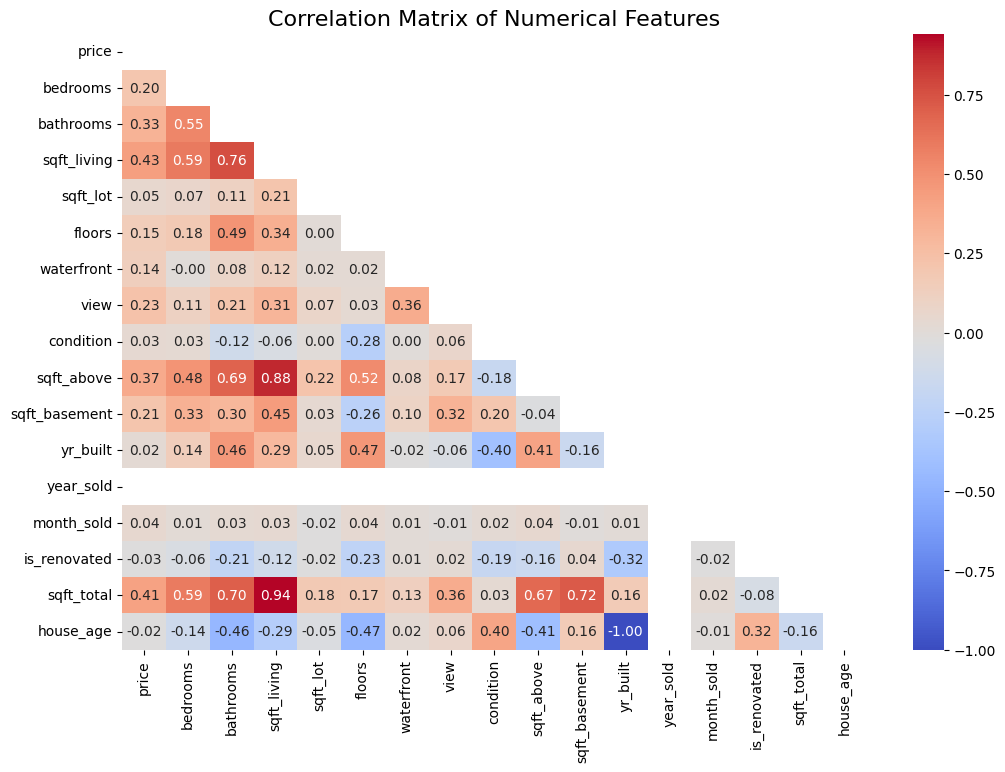

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Bar Plot: Renovation Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_renovated', palette='viridis')
plt.title('Distribution of Renovation Status', fontsize=16)
plt.xticks([0, 1], ['Never Renovated', 'Renovated'])
plt.xlabel('Renovation Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Box Plot: Price Distribution by Waterfront
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='waterfront', y='price', palette='coolwarm')
plt.title('Price Distribution by Waterfront Status', fontsize=16)
plt.xticks([0, 1], ['Non-Waterfront', 'Waterfront'])
plt.xlabel('Waterfront Status', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.yscale('log')  # Use log scale for better visualization
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

## hypothesis testing

In [ ]:
from scipy.stats import ttest_ind
import numpy as np


waterfront_prices = df[df['waterfront'] == 1]['price']
non_waterfront_prices = df[df['waterfront'] == 0]['price']

# normality check using Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(waterfront_prices)
print(f"Shapiro Test for Waterfront Prices: Statistic={stat:.3f}, p={p:.3f}")
stat, p = shapiro(non_waterfront_prices)
print(f"Shapiro Test for Non-Waterfront Prices: Statistic={stat:.3f}, p={p:.3f}")

# two-sample t-test
t_stat, p_value = ttest_ind(waterfront_prices, non_waterfront_prices, equal_var=False)

# Print results
print(f"T-Test Results: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

# Decision
if p_value < 0.05:
    print("Reject the null hypothesis: Waterfront properties are priced significantly higher.")
else:
    print("Fail to reject the null hypothesis: No significant difference in pricing.")


Shapiro Test for Waterfront Prices: Statistic=0.774, p=0.000
Shapiro Test for Non-Waterfront Prices: Statistic=0.375, p=0.000
T-Test Results: t-statistic = 3.648, p-value = 0.001
Reject the null hypothesis: Waterfront properties are priced significantly higher.


In [ ]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test
u_statistic, p_value_mw = mannwhitneyu(waterfront_prices, non_waterfront_prices, alternative='two-sided')


print(f"Mann-Whitney U Test Results: U-statistic = {u_statistic:.3f}, p-value = {p_value_mw:.3f}")

# Decision
if p_value_mw < 0.05:
    print("Reject the null hypothesis: Waterfront properties are priced significantly higher.")
else:
    print("Fail to reject the null hypothesis: No significant difference in pricing.")


Mann-Whitney U Test Results: U-statistic = 118237.500, p-value = 0.000
Reject the null hypothesis: Waterfront properties are priced significantly higher.


In [ ]:
# Hypothesis 1: More Bedrooms vs Fewer Bedrooms
more_bedrooms = df[df['bedrooms'] >= 4]['price']
fewer_bedrooms = df[df['bedrooms'] < 4]['price']

# Mann-Whitney U test for Hypothesis 1
u_stat_bedrooms, p_value_bedrooms = mannwhitneyu(more_bedrooms, fewer_bedrooms, alternative='two-sided')
print(f"Mann-Whitney U Test for Hypothesis 1: U-statistic = {u_stat_bedrooms:.3f}, p-value = {p_value_bedrooms:.3f}")

# Decision for Hypothesis 1
if p_value_bedrooms < 0.05:
    print("Reject the null hypothesis: Homes with more bedrooms are priced significantly higher.")
else:
    print("Fail to reject the null hypothesis: No significant difference in pricing based on bedrooms.")

# Hypothesis 2: Post-2000 homes vs Pre-2000 homes

post_2000 = df[df['yr_built'] > 2000]['price']
pre_2000 = df[df['yr_built'] <= 2000]['price']

# Mann-Whitney U test for Hypothesis 2
u_stat_year_built, p_value_year_built = mannwhitneyu(post_2000, pre_2000, alternative='greater')
print(f"Mann-Whitney U Test for Hypothesis 3: U-statistic = {u_stat_year_built:.3f}, p-value = {p_value_year_built:.3f}")

# Decision for Hypothesis 3
if p_value_year_built < 0.05:
    print("Reject the null hypothesis: Homes built after 2000 are priced significantly higher.")
else:
    print("Fail to reject the null hypothesis: No significant difference in pricing based on year built.")


Mann-Whitney U Test for Hypothesis 1: U-statistic = 3553338.500, p-value = 0.000
Reject the null hypothesis: Homes with more bedrooms are priced significantly higher.
Mann-Whitney U Test for Hypothesis 3: U-statistic = 2032478.500, p-value = 0.000
Reject the null hypothesis: Homes built after 2000 are priced significantly higher.


In [ ]:
# outliers removal
# IQR for price and sqft_living
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
df = df[(df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)]

In [18]:
import numpy as np
df['log_price'] = np.log1p(df['price'])  # log(1 + price) for handling zeros


In [19]:
# One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['waterfront', 'view', 'city'], drop_first=True)


In [21]:
df['sqft_bedrooms'] = df['sqft_living'] * df['bedrooms']
df['sqft_bathrooms'] = df['sqft_living'] * df['bathrooms']


<ipython-input-24-115b55630748>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['yr_renovated'] = pd.to_numeric(df['yr_renovated'].replace('Never Renovated', 0), errors='coerce')
<ipython-input-24-115b55630748>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='renovated', data=df, palette='pastel', ax=axes[1, 0])


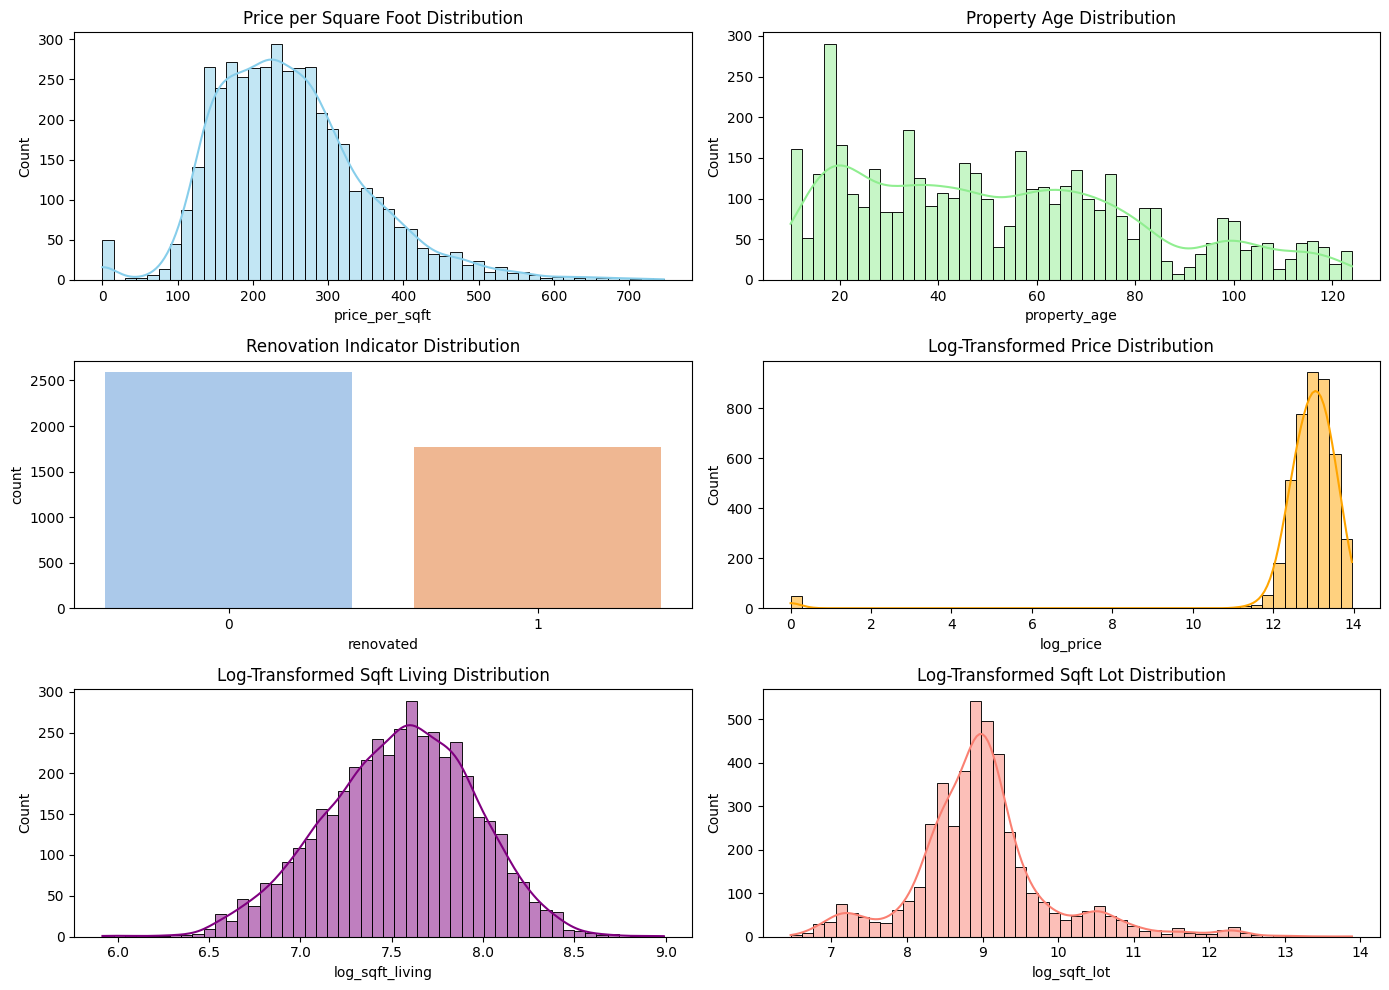

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df['price_per_sqft'] = df['price'] / df['sqft_living']
df['property_age'] = df['yr_built'].apply(lambda x: 2024 - x)  # Adjust to the current year
df['yr_renovated'] = pd.to_numeric(df['yr_renovated'].replace('Never Renovated', 0), errors='coerce')

df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Log transformations for skewed features
df['log_price'] = np.log1p(df['price'])  # log(1 + price) 
df['log_sqft_living'] = np.log1p(df['sqft_living'])
df['log_sqft_lot'] = np.log1p(df['sqft_lot'])


fig, axes = plt.subplots(3, 2, figsize=(14, 10))
sns.histplot(df['price_per_sqft'], bins=50, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Price per Square Foot Distribution')

sns.histplot(df['property_age'], bins=50, kde=True, color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Property Age Distribution')

sns.countplot(x='renovated', data=df, palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title('Renovation Indicator Distribution')


sns.histplot(df['log_price'], bins=50, kde=True, color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Log-Transformed Price Distribution')

sns.histplot(df['log_sqft_living'], bins=50, kde=True, color='purple', ax=axes[2, 0])
axes[2, 0].set_title('Log-Transformed Sqft Living Distribution')

sns.histplot(df['log_sqft_lot'], bins=50, kde=True, color='salmon', ax=axes[2, 1])
axes[2, 1].set_title('Log-Transformed Sqft Lot Distribution')

plt.tight_layout()
plt.show()
